In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
# 60k images by 28*28 size and 60k label

(60000, 28, 28) (60000,)


In [ ]:
# normalize the data (images has value between 0 (black) to 255(white) )
# 0-255 >> 0-1
x_train, x_test = x_train/255.0, x_test/255.0

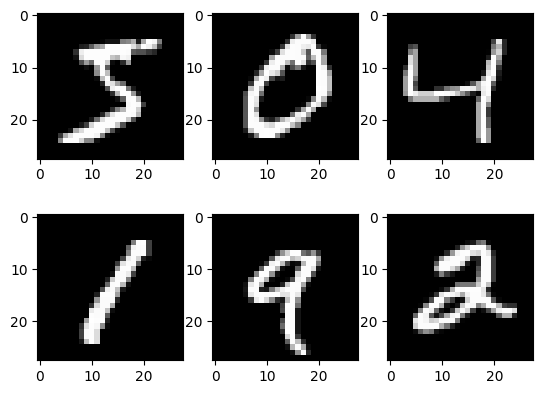

In [12]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

In [ ]:
# model
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape =(28,28)),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(10), #10 output
])

print(model.summary())
# 128 first output, then 10 output

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)  
metrics = ["accuracy"]

model.compile(optimizer=optim, loss=loss, metrics=metrics)

In [32]:
# training
batch_size = 64
epochs = 10

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/10
938/938 - 2s - 2ms/step - accuracy: 0.9987 - loss: 0.0050
Epoch 2/10
938/938 - 1s - 1ms/step - accuracy: 0.9985 - loss: 0.0052
Epoch 3/10
938/938 - 1s - 2ms/step - accuracy: 0.9991 - loss: 0.0036
Epoch 4/10
938/938 - 1s - 2ms/step - accuracy: 0.9988 - loss: 0.0041
Epoch 5/10
938/938 - 2s - 2ms/step - accuracy: 0.9989 - loss: 0.0040
Epoch 6/10
938/938 - 2s - 2ms/step - accuracy: 0.9988 - loss: 0.0042
Epoch 7/10
938/938 - 1s - 1ms/step - accuracy: 0.9997 - loss: 0.0017
Epoch 8/10
938/938 - 1s - 1ms/step - accuracy: 0.9997 - loss: 0.0013
Epoch 9/10
938/938 - 1s - 2ms/step - accuracy: 0.9975 - loss: 0.0075
Epoch 10/10
938/938 - 1s - 1ms/step - accuracy: 0.9999 - loss: 8.5221e-04


In [33]:
# evaulate
model.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - 2ms/step - accuracy: 0.9797 - loss: 0.0991


[0.09912709146738052, 0.9797000288963318]

In [35]:
# predictions
probability_model = keras.models.Sequential([
    model, keras.layers.Softmax()
])

predictions = probability_model(x_test)
pred0 = predictions[0]
print(pred0)

tf.Tensor(
[2.9346193e-12 1.9345707e-15 4.8427967e-10 4.9025605e-08 4.9474443e-19
 4.3462101e-13 4.8578109e-18 1.0000000e+00 8.1613508e-14 1.1082968e-09], shape=(10,), dtype=float32)


In [42]:
# use np.argmax to get label probability
label0 = np.argmax(pred0)
print(label0)

7


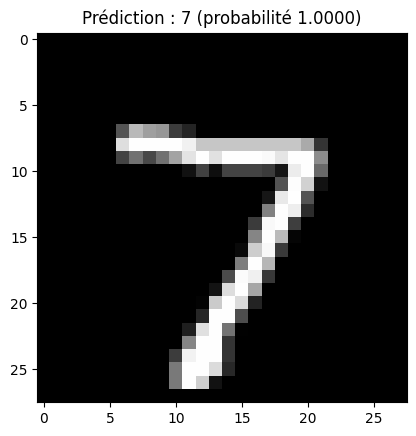

In [44]:
plt.imshow(x_test[0], cmap='gray')
plt.title(f"Prédiction : {label0} (probabilité {pred0[7]:.4f})")
plt.show()